## Importing libs

In [2]:
 import pandas
 import numpy
 from matplotlib import pyplot as plot
 import seaborn as sns

## Exploring the Data

In [3]:
dataset = pandas.read_csv('dataset.csv',sep=';',parse_dates=['data'])

dataset.rename(columns = {'interior/metropolitana':'interior'}, inplace = True)

dataset = dataset.sort_values(by='data')

In [4]:
dataset.head()

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior
0,Brasil,NaN,NaN,76.0,NaN,NaN,NaN,2020-02-25,9.0,210147125.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
1728,Norte,AP,NaN,16.0,NaN,NaN,NaN,2020-02-25,9.0,845731.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
6336,Sul,SC,NaN,42.0,NaN,NaN,NaN,2020-02-25,9.0,7164788.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
6048,Sul,PR,NaN,41.0,NaN,NaN,NaN,2020-02-25,9.0,11433957.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
5760,Sudeste,SP,NaN,35.0,NaN,NaN,NaN,2020-02-25,9.0,45919049.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN


### Checking for nan values

In [5]:
dataset.query('data != data')

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior
146262,Nordeste,MA,Grajaú,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Charts and Visualizations

### Daily Deaths an Cases

Text(0.5, 0, 'Meses')

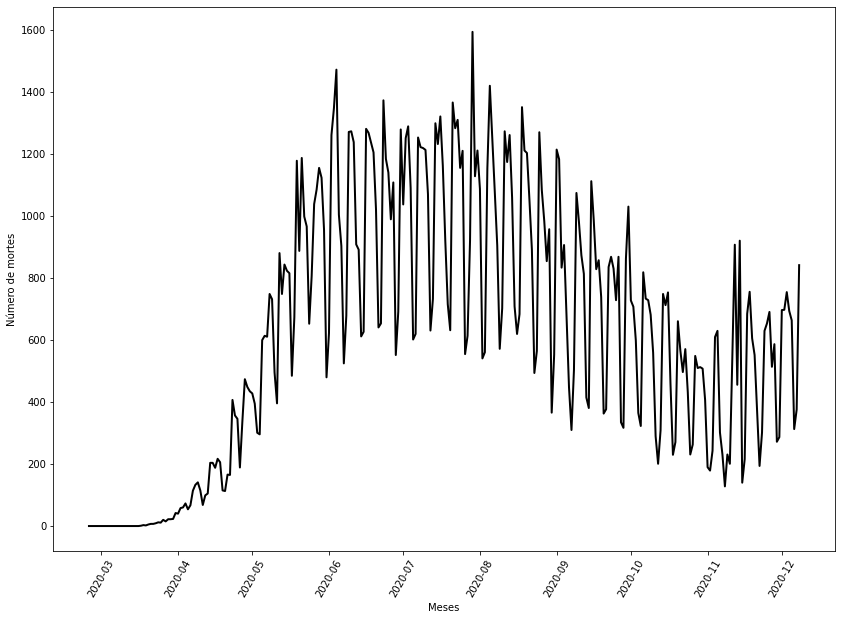

In [6]:
# Deaths through time
deaths_per_date_columns = ['data', 'obitosNovos']

deaths_per_date = dataset[deaths_per_date_columns].groupby(['data']).max().reset_index()

plot.figure(figsize=(14,10))

sns.lineplot(data=deaths_per_date, x='data', y='obitosNovos', color='black', linewidth=2)
plot.xticks(rotation=60)
plot.ylabel('Número de mortes')
plot.xlabel('Meses')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.dates.AutoDateLocator'>
  # Remove the CWD from sys.path while we load stuff.


Text(0.5, 0, 'Meses')

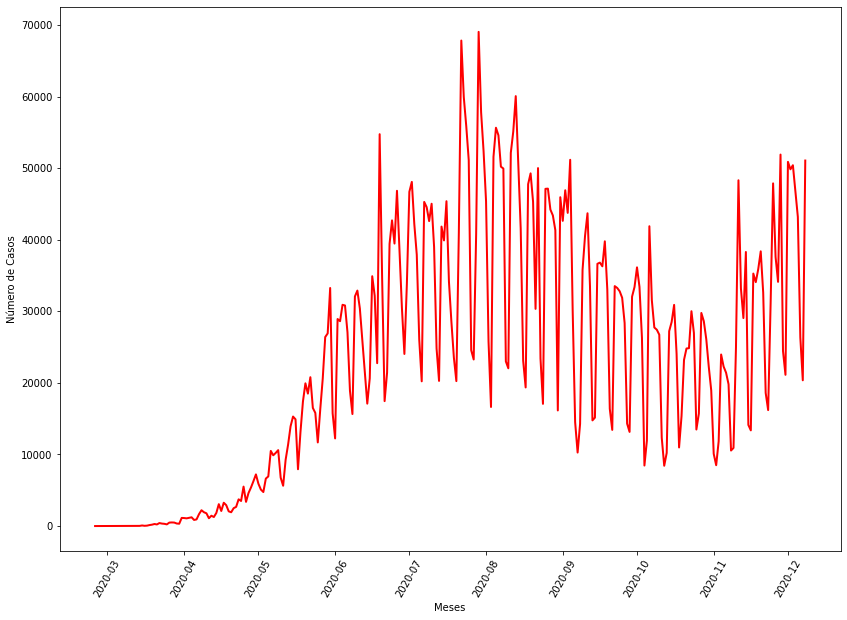

In [7]:
# Cases through time
new_cases_per_date_columns = ['data', 'casosNovos']

new_cases_per_date = dataset[new_cases_per_date_columns].groupby(['data']).max().reset_index()

plot.figure(figsize=(14,10))

sns.lineplot(data=new_cases_per_date, x='data', y='casosNovos', color='red', linewidth=2)
plot.xticks(rotation=60)
plot.locator_params(axis='x', nbins=5)
plot.ylabel('Número de Casos')
plot.xlabel('Meses')

Text(0.5, 0.98, 'Casos x Mortes diárias')

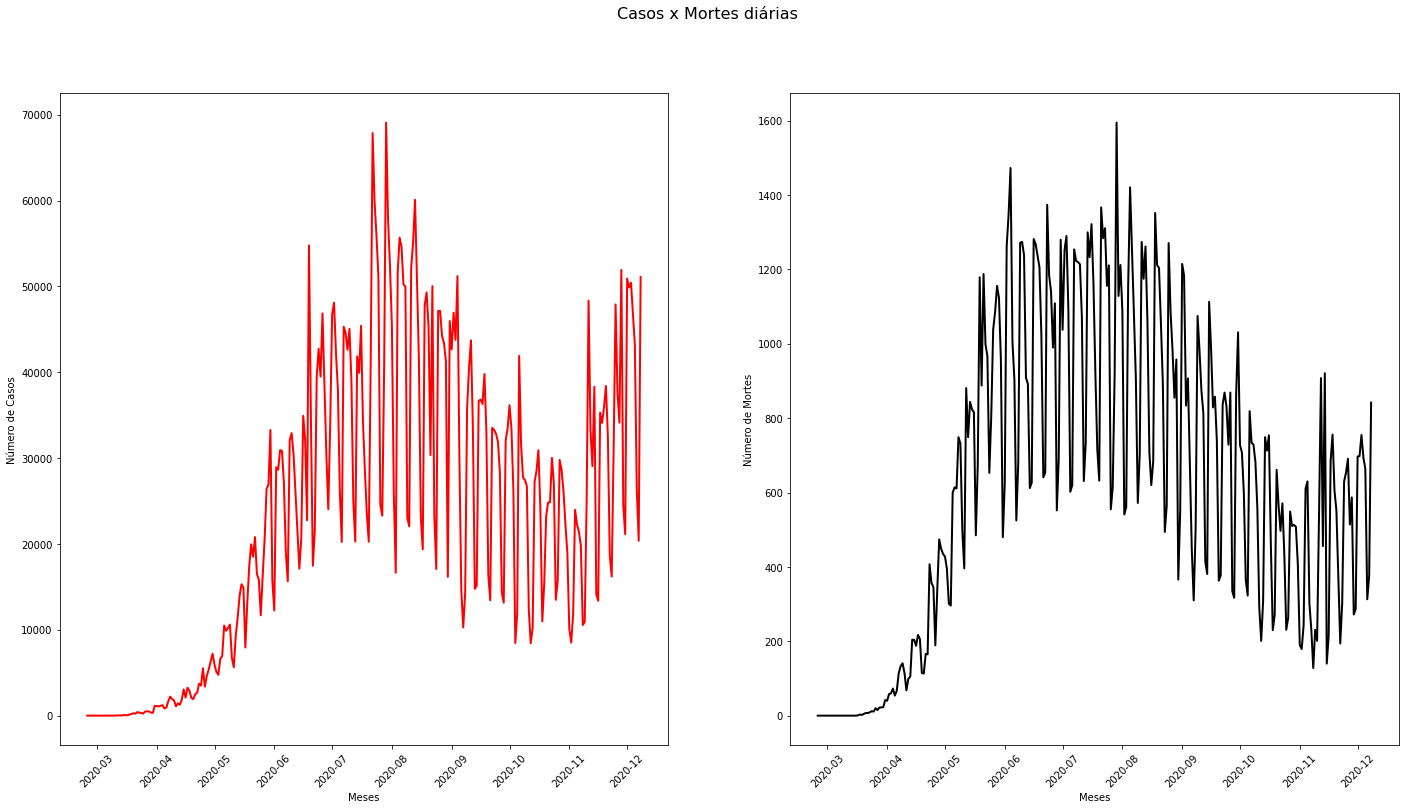

In [8]:
figure, axes = plot.subplots(1,2)
figure.set_size_inches((24,12))

sns.lineplot(data=new_cases_per_date, x='data', y='casosNovos', color='red', linewidth=2, ax=axes[0])
axes[0].set_xlabel('Meses')
axes[0].set_ylabel('Número de Casos')
plot.setp(axes[0].xaxis.get_majorticklabels(), rotation=45)


sns.lineplot(data=deaths_per_date, x='data', y='obitosNovos', color='black', linewidth=2, ax=axes[1])
axes[1].set_xlabel('Meses')
axes[1].set_ylabel('Número de Mortes')
plot.setp(axes[1].xaxis.get_majorticklabels(), rotation=45)

figure.suptitle('Casos x Mortes diárias', fontsize=16)

## Numbers Grouped by state

In [9]:
# number of cases per state
cases_per_state_columns = ['estado', 'casosAcumulado']

cases_per_state = dataset[cases_per_state_columns].groupby(['estado']).max().reset_index()
cases_per_state.sort_values(by='casosAcumulado')


cases_per_state.sort_values(by='casosAcumulado', ascending=False).head()
axes[0].set_xlabel('Meses')
axes[0].set_ylabel('Número de Casos')

Text(17.200000000000017, 0.5, 'Número de Casos')

Text(0, 0.5, 'Número de Casos(escala log)')

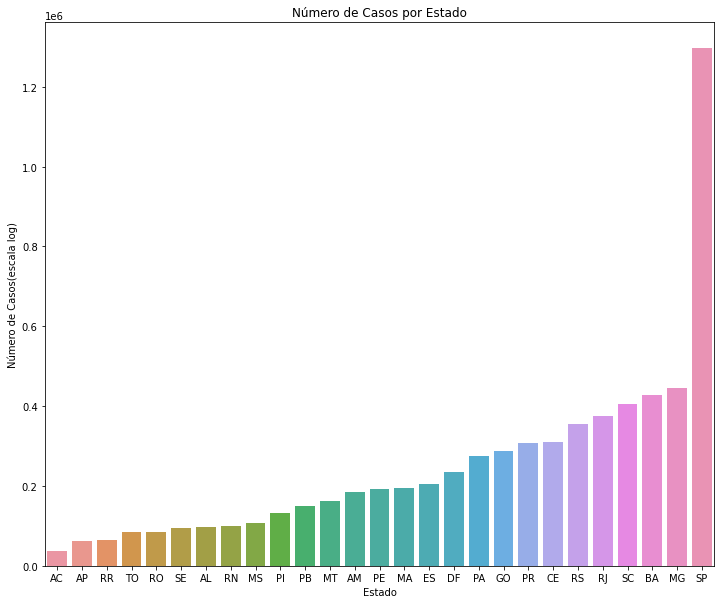

In [10]:
cases_per_state = cases_per_state.sort_values(by='casosAcumulado', ascending=True)

plot.figure(figsize=(12,10))

sns.barplot(x='estado', y='casosAcumulado', data=cases_per_state)
plot.title('Número de Casos por Estado')
plot.xlabel('Estado')
plot.ylabel('Número de Casos(escala log)')

In [11]:
# number of deaths per state
deaths_per_state_columns = ['estado', 'obitosAcumulado']

deaths_per_state = dataset[deaths_per_state_columns].groupby(['estado']).max().reset_index()
deaths_per_state.sort_values(by='obitosAcumulado')


deaths_per_state.sort_values(by='obitosAcumulado', ascending=False).head()

,estado,obitosAcumulado
25,SP,43282.0
18,RJ,23270.0
10,MG,10345.0
5,CE,9738.0
15,PE,9186.0


Text(0, 0.5, 'Número de Mortes(escala log)')

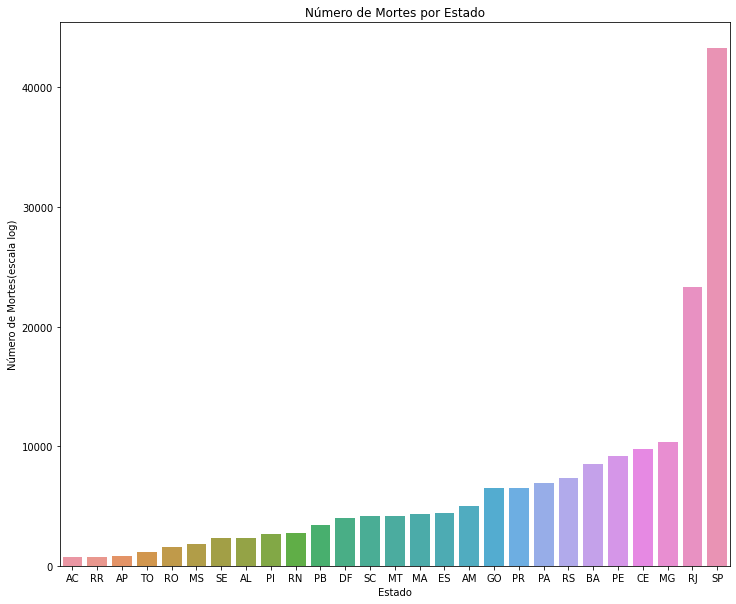

In [12]:
deaths_per_state = deaths_per_state.sort_values(by='obitosAcumulado', ascending=True)

plot.figure(figsize=(12,10))

sns.barplot(x='estado', y='obitosAcumulado', data=deaths_per_state)
plot.title('Número de Mortes por Estado')
plot.xlabel('Estado')
plot.ylabel('Número de Mortes(escala log)')

Text(0.5, 0.98, 'Estados com Maior Número de Casos x Estados com maior Número de Mortes')

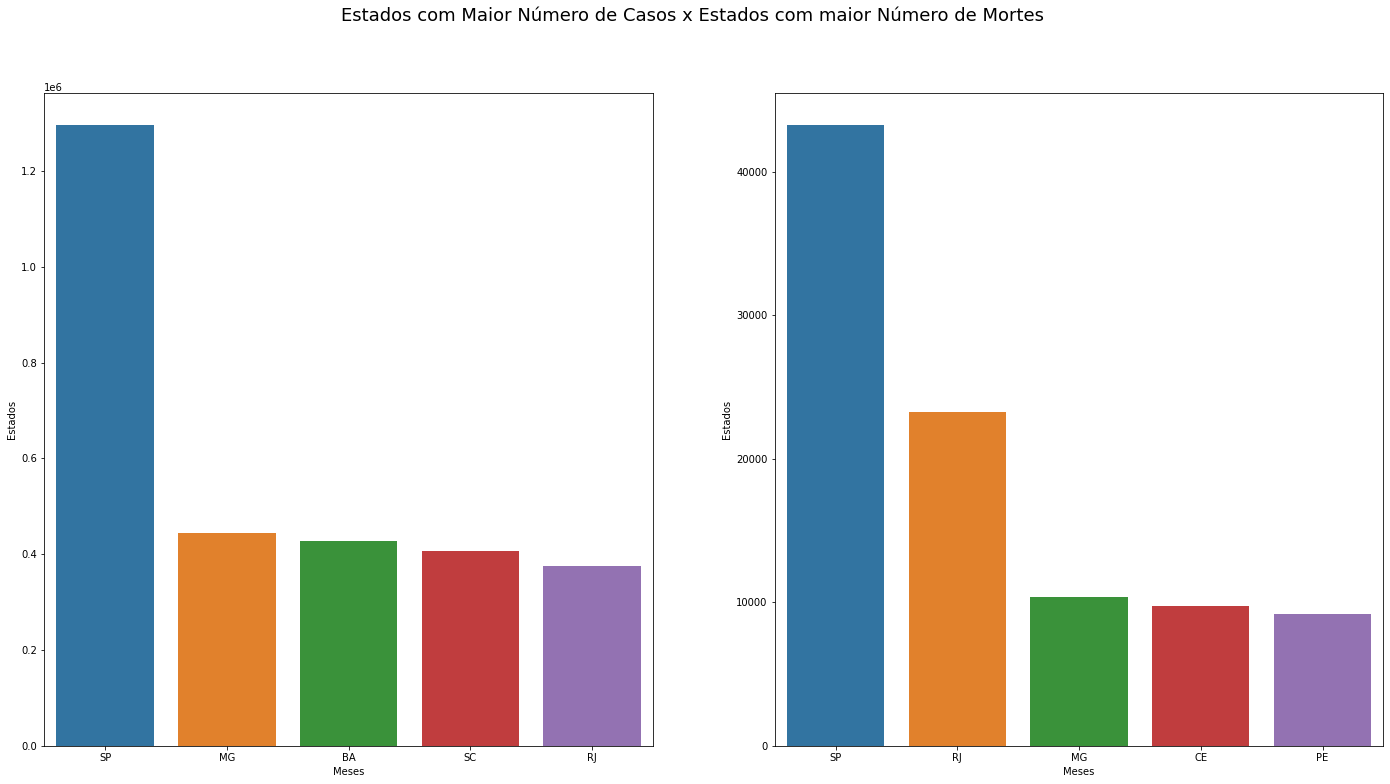

In [13]:
# cases per state x deaths per state
figure, axes = plot.subplots(1,2)
figure.set_size_inches((24,12))

deaths_per_state_top_five = deaths_per_state.sort_values(by='obitosAcumulado', ascending=False).head(5)
cases_per_state_top_five = cases_per_state.sort_values(by='casosAcumulado', ascending=False).head(5)

sns.barplot(x='estado', y='casosAcumulado', data=cases_per_state_top_five, ax=axes[0])
axes[0].set_xlabel('Meses')
axes[0].set_ylabel('Estados')

sns.barplot(x='estado', y='obitosAcumulado', data=deaths_per_state_top_five, ax=axes[1])
axes[1].set_xlabel('Meses')
axes[1].set_ylabel('Estados')

figure.suptitle('Estados com Maior Número de Casos x Estados com maior Número de Mortes', fontsize=18)

## Grouping Data by Area (countryside/metropolitan area)

In [45]:
cases_by_state_and_area_columns = ['estado', 'casosAcumulado', 'interior']

cases_with_area_info = dataset.query('interior == 0 or interior == 1')
cases_with_area_info.dropna()

cases_by_state_and_area = cases_with_area_info[cases_by_state_and_area_columns] \
  .groupby(['estado','interior' ]) \
  .max() \
  .reset_index()

cases_by_state_and_area =  cases_by_state_and_area \
  .loc[cases_by_state_and_area.index.repeat(cases_by_state_and_area.casosAcumulado)] \
  .reset_index(drop=True)

print(cases_by_state_and_area)

       estado  interior  casosAcumulado
0          AC       0.0          3908.0
1          AC       0.0          3908.0
2          AC       0.0          3908.0
3          AC       0.0          3908.0
4          AC       0.0          3908.0
...       ...       ...             ...
352614     TO       1.0         19680.0
352615     TO       1.0         19680.0
352616     TO       1.0         19680.0
352617     TO       1.0         19680.0
352618     TO       1.0         19680.0

[352619 rows x 3 columns]


Text(0.5, 0, 'Número de Mortes')

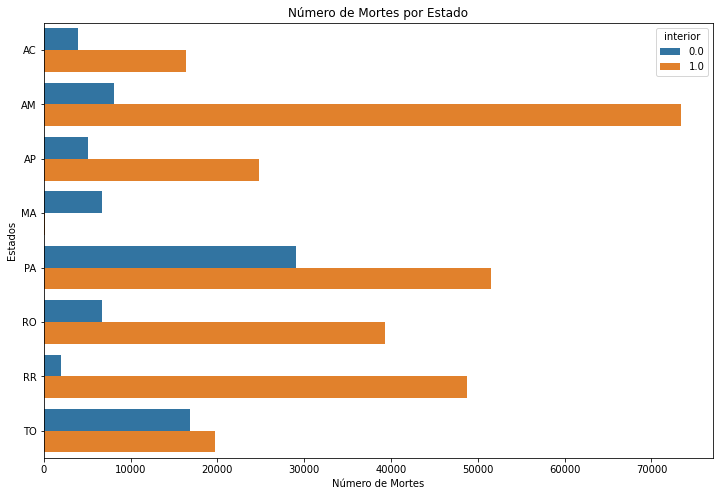

In [46]:
plot.figure(figsize=(12,8))

sns.barplot(x='casosAcumulado', y='estado',data=cases_by_state_and_area, hue='interior')
plot.title('Número de Mortes por Estado')
plot.ylabel('Estados')
plot.xlabel('Número de Mortes')

## Grouping by Countr Region

In [47]:
cases_by_state_and_region_columns = ['estado', 'regiao', 'casosAcumulado']

cases_with_region_info = dataset.query('regiao != "Brasil"')
cases_with_region_info.dropna()

cases_by_state_and_region = cases_with_region_info[cases_by_state_and_region_columns] \
  .groupby(['estado','regiao' ]) \
  .max() \
  .reset_index()

cases_by_state_and_region =  cases_by_state_and_region \
  .loc[cases_by_state_and_region.index.repeat(cases_by_state_and_region.casosAcumulado)] \
  .reset_index(drop=True)

print(cases_by_state_and_region)

        estado regiao  casosAcumulado
0           AC  Norte         37556.0
1           AC  Norte         37556.0
2           AC  Norte         37556.0
3           AC  Norte         37556.0
4           AC  Norte         37556.0
...        ...    ...             ...
6674994     TO  Norte         83948.0
6674995     TO  Norte         83948.0
6674996     TO  Norte         83948.0
6674997     TO  Norte         83948.0
6674998     TO  Norte         83948.0

[6674999 rows x 3 columns]


Text(0, 0.5, 'Região')

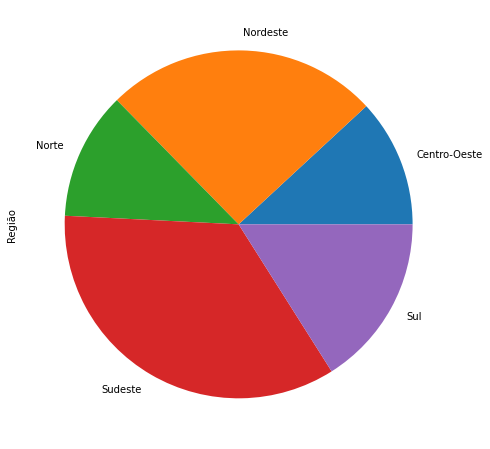

In [51]:
plot.figure(figsize=(12,8))

cases_per_region = cases_by_state_and_region['regiao'].value_counts(normalize=True).sort_index() * 100

cases_per_region.plot.pie()
plot.ylabel('Região')